# --- KOMÓRKA 1: Import bibliotek ---

In [25]:
import os, shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


# --- Ustawienia ---

In [26]:
CLASSES = ['strawberry_healthy', 'potato_healthy', 'corn_healthy']
DATA_DIR = 'data'
IMG_SIZE = (128,128)
BATCH_SIZE = 32
SEED = 42
FOLDS = 3

# --- Wczytaj wszystkie obrazy do jednej macierzy ---

In [27]:
images = []
labels = []
class_indices = {cls:i for i,cls in enumerate(CLASSES)}

for label, cls in enumerate(CLASSES):
    dir_path = os.path.join(DATA_DIR, cls)
    all_files = os.listdir(dir_path)
    # Jeśli masz bardzo wiele obrazów, odkomentuj (np max 300 z każdej klasy):
    # all_files = all_files[:300]
    for file in all_files:
        img = load_img(os.path.join(dir_path, file), target_size=IMG_SIZE)
        img = img_to_array(img)/255.
        images.append(img)
        labels.append(label)
images = np.array(images)
labels = np.array(labels)


print("Obrazów:", images.shape, "Etykiet:", labels.shape)

Obrazów: (1770, 128, 128, 3) Etykiet: (1770,)


# --- Funkcja budowy modelu ---

In [28]:
def build_model(n_layers=2, n_neurons=64, input_shape=(128,128,3), n_classes=3, lr=1e-3):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
    for _ in range(n_layers):
        model.add(tf.keras.layers.Conv2D(n_neurons, (3,3), activation='relu', padding='same'))
        model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(n_neurons, activation='relu'))
    model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# --- KFold cross-validation ---


=== Fold 1/3 ===
Epoch 1/10


c:\Users\Antek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.7600 - loss: 0.7416 - val_accuracy: 0.9712 - val_loss: 0.0922
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9681 - loss: 0.0831 - val_accuracy: 0.9797 - val_loss: 0.0596
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9943 - loss: 0.0286 - val_accuracy: 0.9864 - val_loss: 0.0425
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9835 - loss: 0.0345 - val_accuracy: 0.9831 - val_loss: 0.0482
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 0.9847 - val_loss: 0.0424
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9999 - loss: 0.0041 - val_accuracy: 0.9864 - val_loss: 0.0306
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9881 - val_loss: 0.0299
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9915 - val_loss: 0.

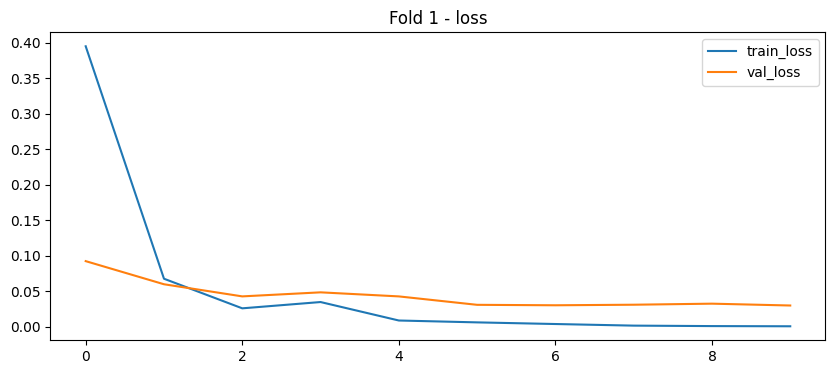

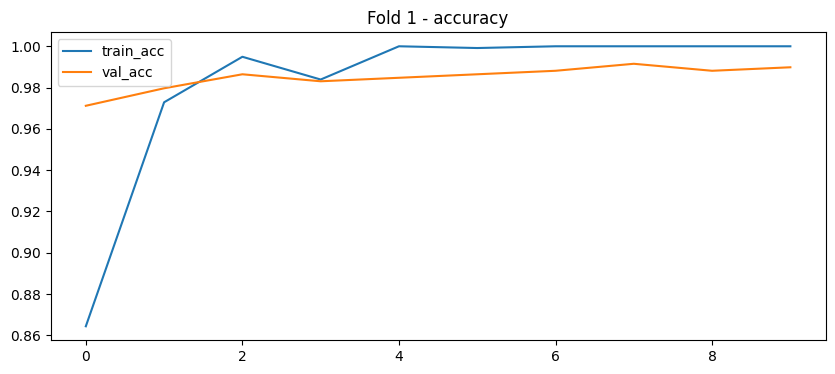


=== Fold 2/3 ===
Epoch 1/10


c:\Users\Antek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.7641 - loss: 0.6626 - val_accuracy: 0.9729 - val_loss: 0.0990
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9720 - loss: 0.0711 - val_accuracy: 0.9814 - val_loss: 0.0341
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.9970 - loss: 0.0160 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9864 - val_loss: 0.0271
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9940 - loss: 0.0133 - val_accuracy: 0.9797 - val_loss: 0.0407
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.9955 - loss: 0.0172 - val_accuracy: 0.9949 - val_loss: 0.0151
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.

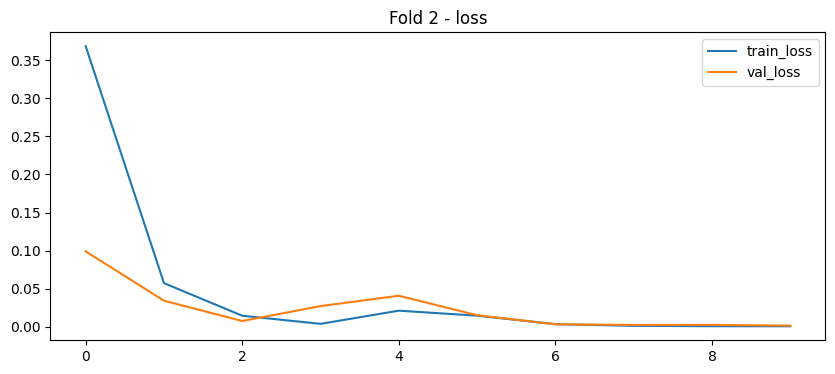

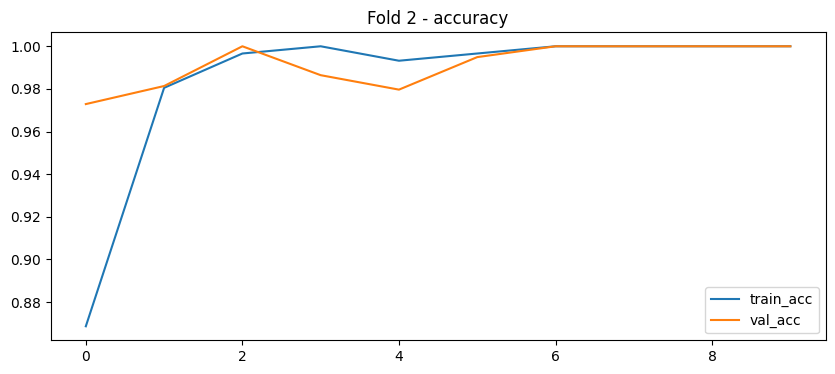


=== Fold 3/3 ===
Epoch 1/10


c:\Users\Antek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.7726 - loss: 0.6009 - val_accuracy: 0.9661 - val_loss: 0.0713
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.9808 - loss: 0.0628 - val_accuracy: 0.9814 - val_loss: 0.0436
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.9888 - loss: 0.0288 - val_accuracy: 0.9915 - val_loss: 0.0214
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.9973 - loss: 0.0130 - val_accuracy: 0.9949 - val_loss: 0.0098
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.9991 - loss: 0.0035 - val_accuracy: 0.9983 - val_loss: 0.0046
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9983 - val_loss: 0.0064
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9983 - val_loss: 0.

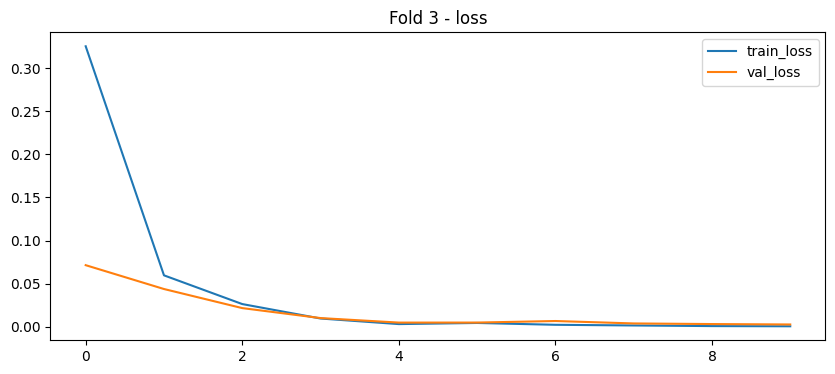

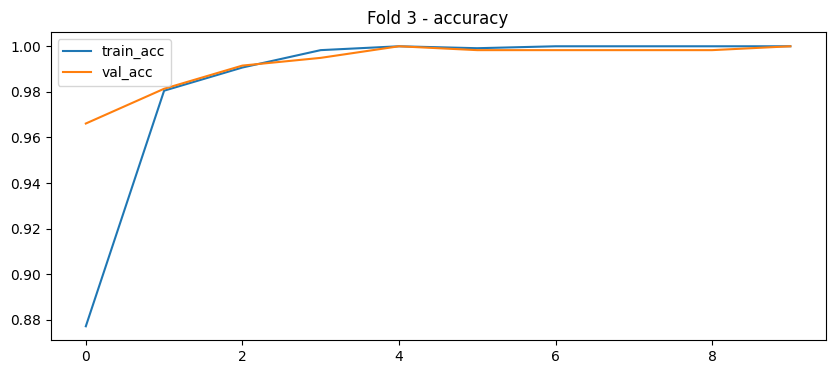

In [29]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
histories = []
results = []

for fold, (train_idx, test_idx) in enumerate(kf.split(images)):
    print(f"\n=== Fold {fold+1}/{FOLDS} ===")
    X_train, X_test = images[train_idx], images[test_idx]
    y_train, y_test = labels[train_idx], labels[test_idx]
    # One-hot encoding
    y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=len(CLASSES))
    y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=len(CLASSES))
    
    model = build_model(n_layers=2, n_neurons=32, input_shape=IMG_SIZE+(3,), n_classes=len(CLASSES))
    h = model.fit(X_train, y_train_cat, epochs=10, batch_size=BATCH_SIZE,
                  validation_data=(X_test, y_test_cat),
                  verbose=1)
    histories.append(h)
    
    # Predykcje
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba,axis=1)
    
    # Metryki folda
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    results.append([acc, prec, rec, f1])
    
    print(f"Fold {fold+1} Accuracy: {acc:.3f} Precision: {prec:.3f} Recall: {rec:.3f} F1: {f1:.3f}")
    print(classification_report(y_test, y_pred, target_names=CLASSES))

    # Można wykreślić loss/accuracy dla każdego folda
    plt.figure(figsize=(10,4))
    plt.plot(h.history['loss'], label='train_loss')
    plt.plot(h.history['val_loss'], label='val_loss')
    plt.title(f'Fold {fold+1} - loss')
    plt.legend(), plt.show()

    plt.figure(figsize=(10,4))
    plt.plot(h.history['accuracy'], label='train_acc')
    plt.plot(h.history['val_accuracy'], label='val_acc')
    plt.title(f'Fold {fold+1} - accuracy')
    plt.legend(), plt.show()

# --- Średnie metryki (po wszystkich foldach) ---

In [30]:
results = np.array(results)
print("\n=== ŚREDNIE WYNIKI K-FOLDS ===")
print(f"Accuracy: {results[:,0].mean():.3f} ± {results[:,0].std():.3f}")
print(f"Precision: {results[:,1].mean():.3f} ± {results[:,1].std():.3f}")
print(f"Recall: {results[:,2].mean():.3f} ± {results[:,2].std():.3f}")
print(f"F1: {results[:,3].mean():.3f} ± {results[:,3].std():.3f}")


=== ŚREDNIE WYNIKI K-FOLDS ===
Accuracy: 0.997 ± 0.005
Precision: 0.993 ± 0.010
Recall: 0.991 ± 0.013
F1: 0.992 ± 0.012
